### Novelties since last version

The last version relies on an excel input, which needed a lot of cleaning. This version relies on a cleaner datafile made by Christoph, which requires less preprocessing.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from copy import deepcopy

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load data

In [2]:
data_path = '../data/raw/'
in_file = '20240425_dataset_cleaned.csv'
df=pd.read_csv(data_path+in_file)



Check that there are no repeated articles

In [3]:
if df.article.duplicated().any():
    duplicate_idx=df.article.duplicated().index
    print("The following articles seem duplicate",df.article[duplicate_idx])
    raise RuntimeError("There are duplicate entries in the dataset. Instead of going on, please check your dataset")
else:
    print('There are no evident duplicates')

There are no evident duplicates


In [4]:
#Manual check, in case two duplicates of an article are written in similar way
# df.article.sort_values()


In [5]:
'''
The different datasets are not written as lists. We change this: at the end of this cell, 
each article is assigned a list of datasets that were used for that article
'''   

for i in range(len(df)):
    if isinstance(df.dataset[i], str):    
        raw_entry = [df.dataset[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'dataset'] = new_entry.copy()


Manually replace entries that correspond to the same dataset, but have a slightly different wording


In [7]:
# the following function is commented because it is bugged

# def replace_strings(data_series, strings=None):
#     '''
#     data_series is the data series from which we wish to replace
#     strings is a list, in which each entry is 2-element list: 
#             - the first element is the string to replace, 
#             - the second is what we replace with
#     '''
    
#     dummy_series = data_series.copy(deep=True)
    
#     if strings==None:
#         print('No strings to replace were provided')
#         return

#     if isinstance(data_series[0],str):
#         raise NotImplementedError
        
#     if isinstance(data_series[0],list):
#         for elems in data_series: # iterate through each line in the data series
# #             print('elems = ',elems)
#             for ielem, individual_elem in enumerate(elems): # each line may have several elements
# #                 print('individual_elem: ',individual_elem)
#                 temp=individual_elem.replace(strings[0][0],strings[0][1])
#                 for irep in range(1,len(strings)): # iterate through all the possible changes to the strings
#                     temp=temp.replace(strings[irep][0],strings[irep][1])
# #                 print('temp :',temp)                    
#                 dummy_series.at[ielem]=temp
    
# #     print(dummy_series)
#     flattened_dataset = sum(dummy_series,[])
#     unique_datasets = np.unique(flattened_dataset)
#     print("Datasets in our database: ",unique_datasets)

#     data_series=deepcopy(dummy_series)
        
# rep_strings=[['Japanese Ministry of Environment (2018)','Japanese Ministry of Environment'],
#              ['Japanese Ministry of the Environment','Japanese Ministry of Environment'],
#              ['Wu et al. 2016','Wu et al. (2016)'],
#              ['Khan et al. (2019a)','Khan et al. (2019)'],
#              ['Khan et al. 2019','Khan et al. (2019)'],
#              ['Khan et al. 2019a','Khan et al. (2019)'],
#              ['Khan et al. 2019b','Khan et al. (2019)'],
#              ['Khan et al. (2019)a','Khan et al. (2019)'],
#              ['Khan et al. (2019)b','Khan et al. (2019)'],
#              ['not reported','unclear/not reported'],
#              ['other unclear','unclear/not reported'],
#              ['ECHA database','ECHA'],
#              ['ECHA’s risk assessment report','ECHA'],
#              ['Pesticide Properties Database (PPDB)','PPDB'],
#              ['Pesticides Properties Database (PPDB)','PPDB'],
#              ['ECOTOX Database','ECOTOX'],
#              ['data provided by Solvay','Solvay'],
#             ]
# replace_strings(df.dataset,rep_strings)

    


for ds in df.dataset:
    for iis,individual_source in enumerate(ds):
        temp=individual_source.replace('Wu et al. 2016','Wu et al. (2016)')
        temp=temp.replace('Japanese Ministry of Environment (2018)','Japanese Ministry of Environment')
        temp=temp.replace('Japanese Ministry of the Environment','Japanese Ministry of Environment')
        temp=temp.replace('Khan et al. (2019a)','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019a','Khan et al. (2019)')
        temp=temp.replace('Khan et al. 2019b','Khan et al. (2019)')
        temp=temp.replace('Khan et al. (2019)a','Khan et al. (2019)')
        temp=temp.replace('Khan et al. (2019)b','Khan et al. (2019)')
        temp=temp.replace('not reported','unclear/not reported')
        temp=temp.replace('other unclear','unclear/not reported')
        temp=temp.replace('ECHA database','ECHA')
        temp=temp.replace('ECHA’s risk assessment report','ECHA')
        temp=temp.replace('Pesticide Properties Database (PPDB)','PPDB')
        temp=temp.replace('Pesticides Properties Database (PPDB)','PPDB')
        temp=temp.replace('ECOTOX Database','ECOTOX')
        temp=temp.replace('data provided by Solvay','Solvay')
        ds[iis]=temp



In [8]:
# Create a list of all the used datasets

flattened_dataset = sum(df.dataset.values,[])
unique_datasets = np.unique(flattened_dataset)
print("Datasets in our database: ",unique_datasets)

Datasets in our database:  ['AMBIT Database Database' 'Aquire' 'Aranda et al. (2017)'
 'Austin et al. (2015)' 'Benfenati (2011)'
 'Canadian Domestic Substances list' 'Cassani et al. (2013)'
 'Cassotti et al. (2015)' 'Cheng et al. (2012)' 'Devillers (2001)' 'EAT5'
 'ECETOC' 'ECHA' 'ECOSAR' 'ECOTOX' 'EFSA'
 'EPA fathead minnow acute toxicity database (EPAFHM)' 'ESIS'
 'Eldred et al. (1999)' 'EnviChem' 'EnviroTox' 'Environment (2014)'
 'European Food Safety Authority (EFSA) Database'
 'Fathead minnow database' 'Furuhama et al. 2016' 'HSDB'
 'Hommel compendium' 'INERIS' 'Japanese Ministry of Environment'
 'Japanese National Institute of Technology and Evaluation (NITE)'
 'Jia et al. (2020)' 'Khan et al. (2019)' 'Li et al. (2017)'
 'Lyakurwa et al. (2014)' 'Maran et al. (2007)' 'Martin and Young (2001)'
 'Mid-Continent Ecology Division of US EPA ‘National Health and Environmental Effect Research Laboratory'
 'OASIS' 'OECD QSAR Toolbox'
 'Office of Pesticide Programs (OPP) Pesticides Ecotoxi

# Basic stats

In [9]:
# Columns that identify the article
id_cols = ['entry_id', 'article', 'article_short']

## Datasets

In [10]:
dataset_cols = ['dataset', 'version',
       'dataset_chemical_space', 'dataset_tax_space', 'dataset_expspace']


### Dataset sources
How many times each dataset is used

In [11]:
# Create histogram of the datasets
histo_datasets = np.ndarray(len(unique_datasets))

for ids,ds in enumerate(unique_datasets):
    histo_datasets[ids]=flattened_dataset.count(ds)

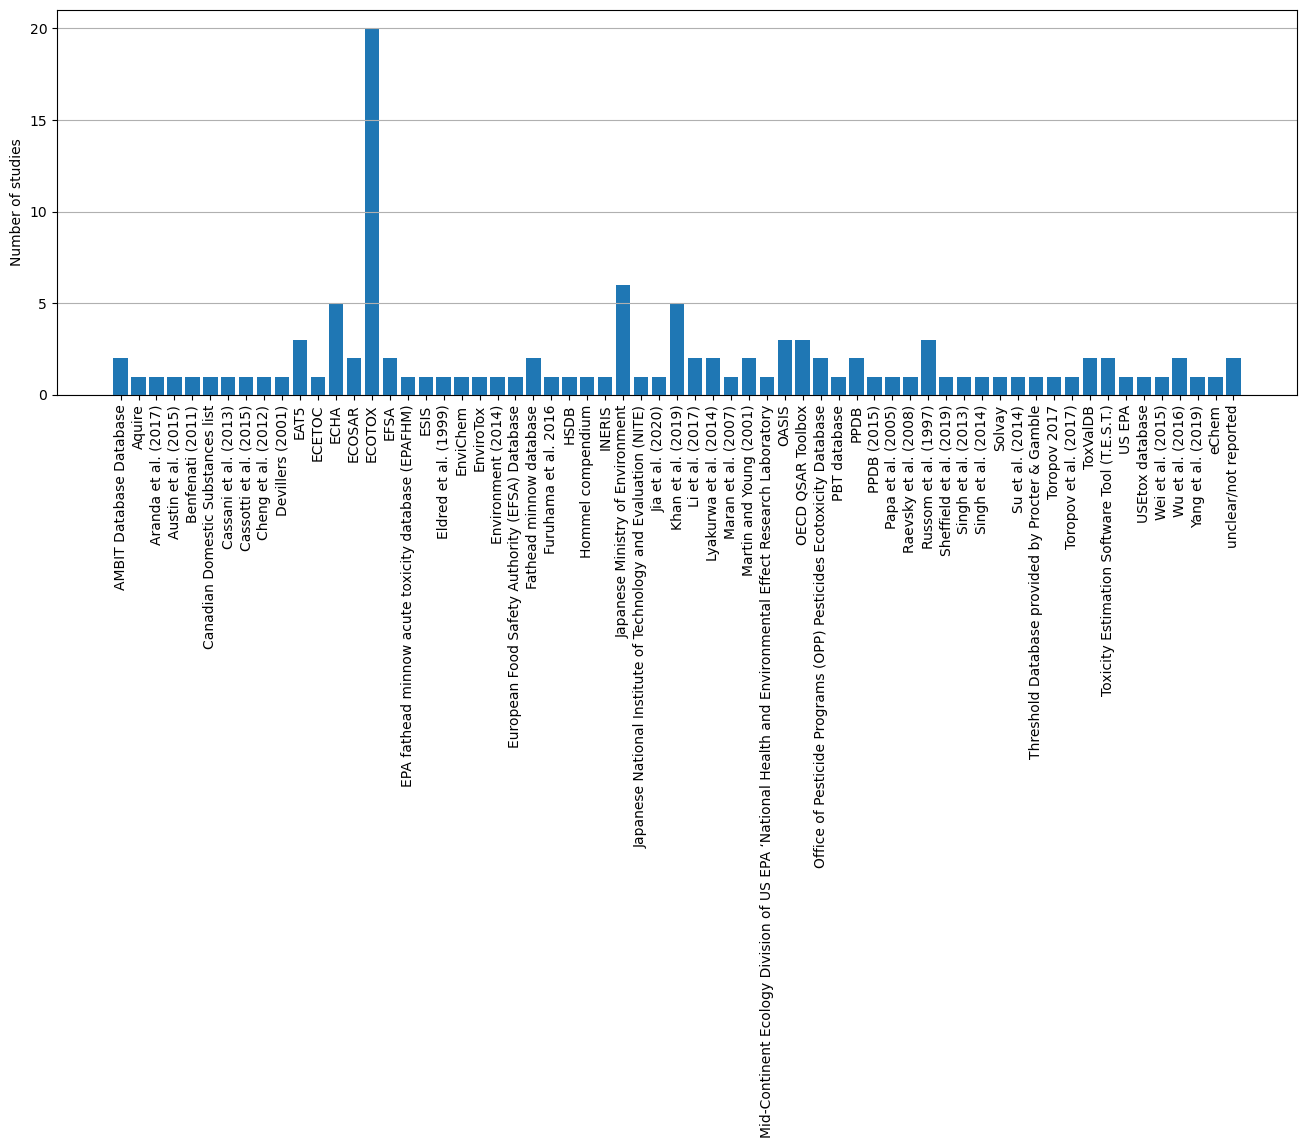

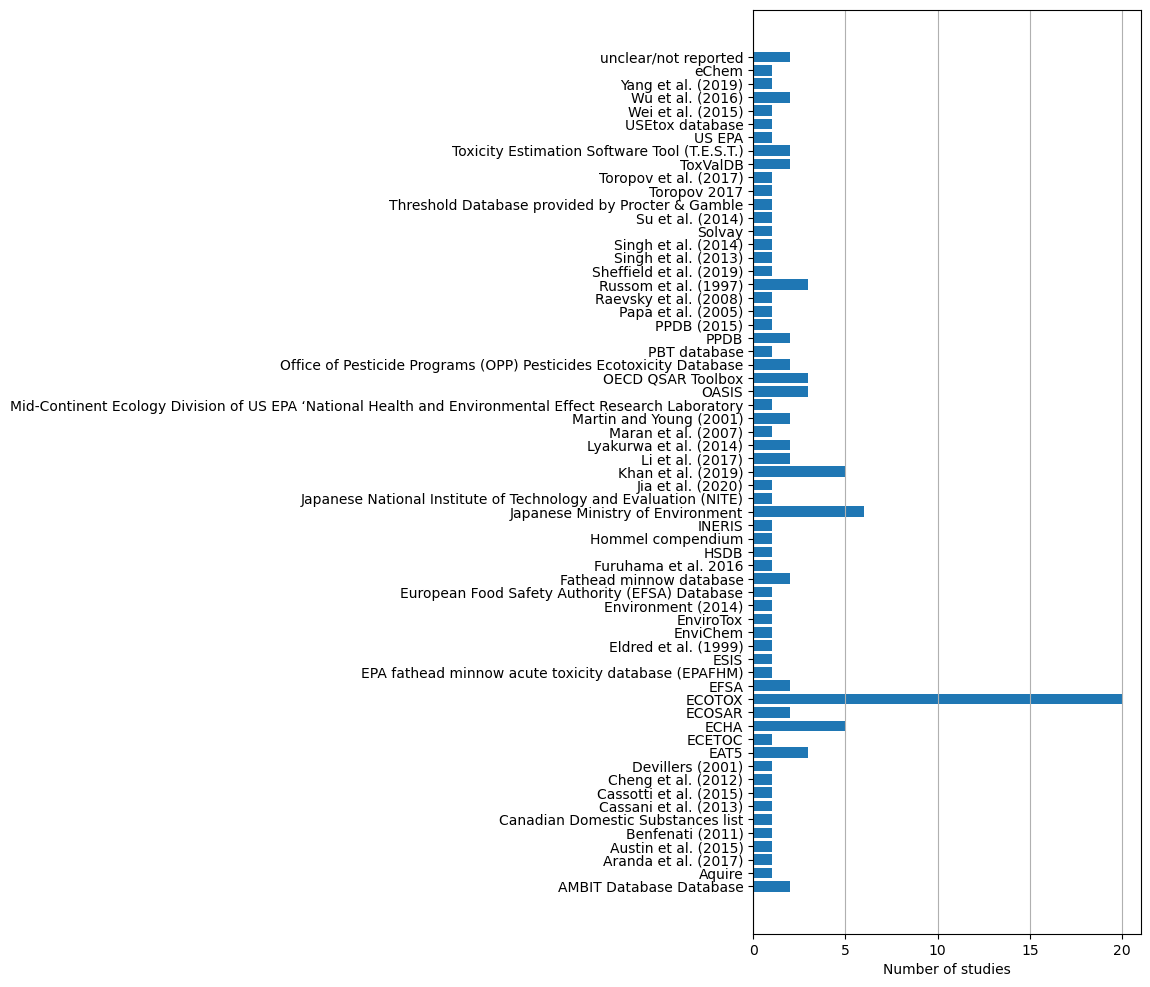

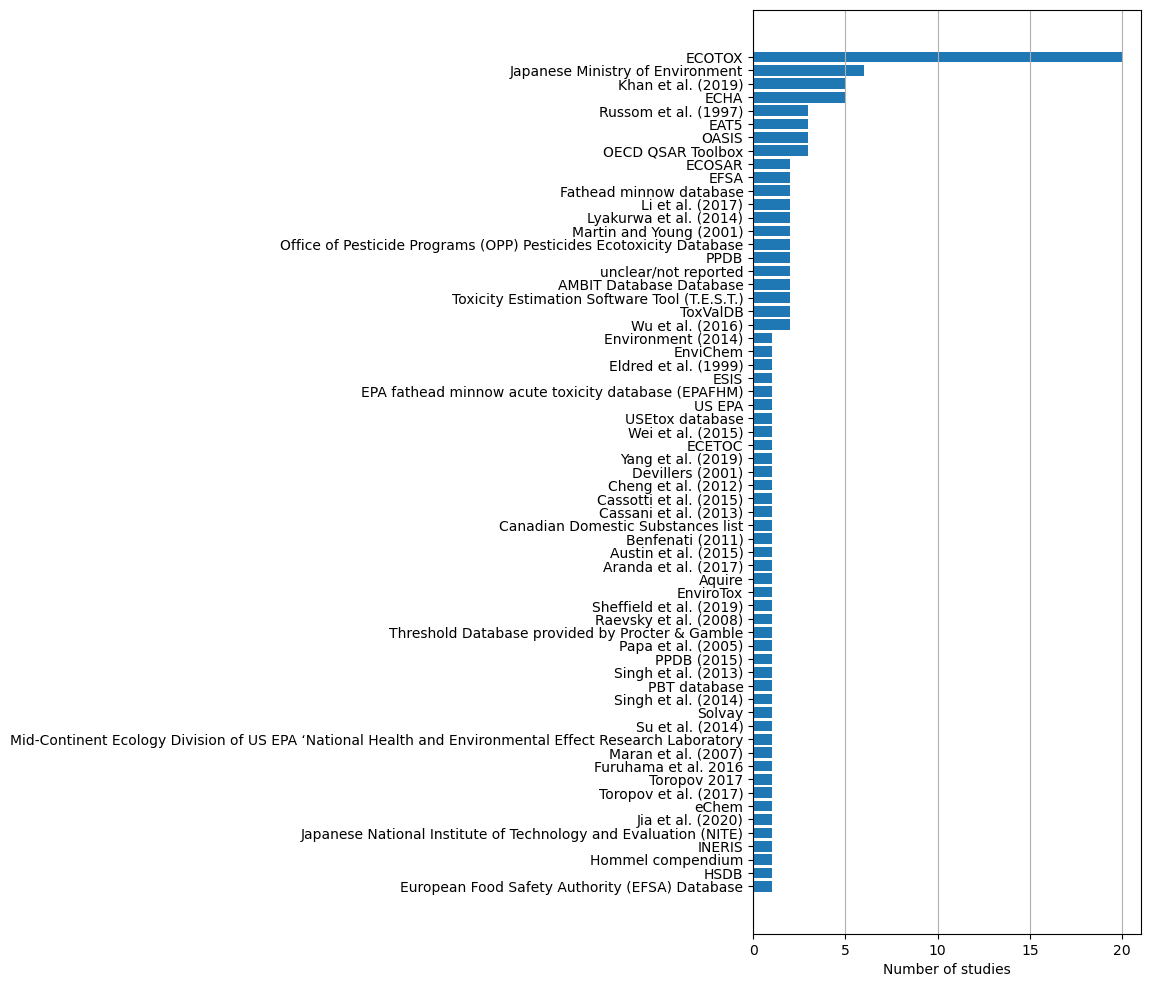

In [28]:
fig, ax = plt.subplots(figsize=(16,5), nrows=1, ncols=1)

# Histogram of the datasets
ax.bar(unique_datasets,histo_datasets)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,21,5))
plt.ylabel('Number of studies')
plt.grid(axis='y')
plt.show()


# Same figure, with horizontal bars
fig, ax = plt.subplots(figsize=(5,12), nrows=1, ncols=1)
ax.barh(unique_datasets,histo_datasets)
plt.xticks(np.arange(0,21,5))
plt.grid(axis='x')
plt.xlabel('Number of studies')
plt.show()


# Same figure, sorted by occurrence
fig, ax = plt.subplots(figsize=(5,12), nrows=1, ncols=1)
sorted_indices=np.argsort(histo_datasets)
ax.barh(unique_datasets[sorted_indices],histo_datasets[sorted_indices])
plt.xticks(np.arange(0,21,5))
plt.grid(axis='x')
plt.xlabel('Number of studies')

plt.show()

### Dataset Version


Count number of times that the dataset version was reported

In [30]:
df.version.value_counts()

not reported                   28
single paper                    4
accessed 17.5.2023              1
accessed 14.06.2023             1
march 2014                      1
accessed 06.11.2020             1
Version 4.2 of the software     1
44819                           1
44656                           1
Name: version, dtype: int64

In [31]:
# Take the non reported ones, and count all the rest as reported

label_nonreported = df.version.value_counts().index[0]
number_nonreported = df.version.value_counts()[0]+df.version.isnull().sum()

label_reported = 'reported'
number_reported = len(df.version)-number_nonreported


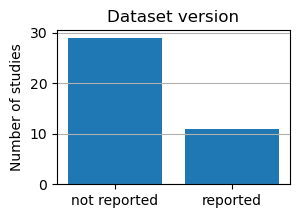

In [32]:
fig, ax = plt.subplots(figsize=(3,2), nrows=1, ncols=1)

labels=[label_nonreported,label_reported]
bars=[number_nonreported,number_reported]

ax.bar(labels,bars)
# plt.xticks(rotation=90)
# plt.yticks(range(21))
plt.ylabel('Number of studies')
plt.grid(axis='y')
plt.title('Dataset version')
plt.show()


### Plot chemical space

This needs to be coarsened in bigger categories

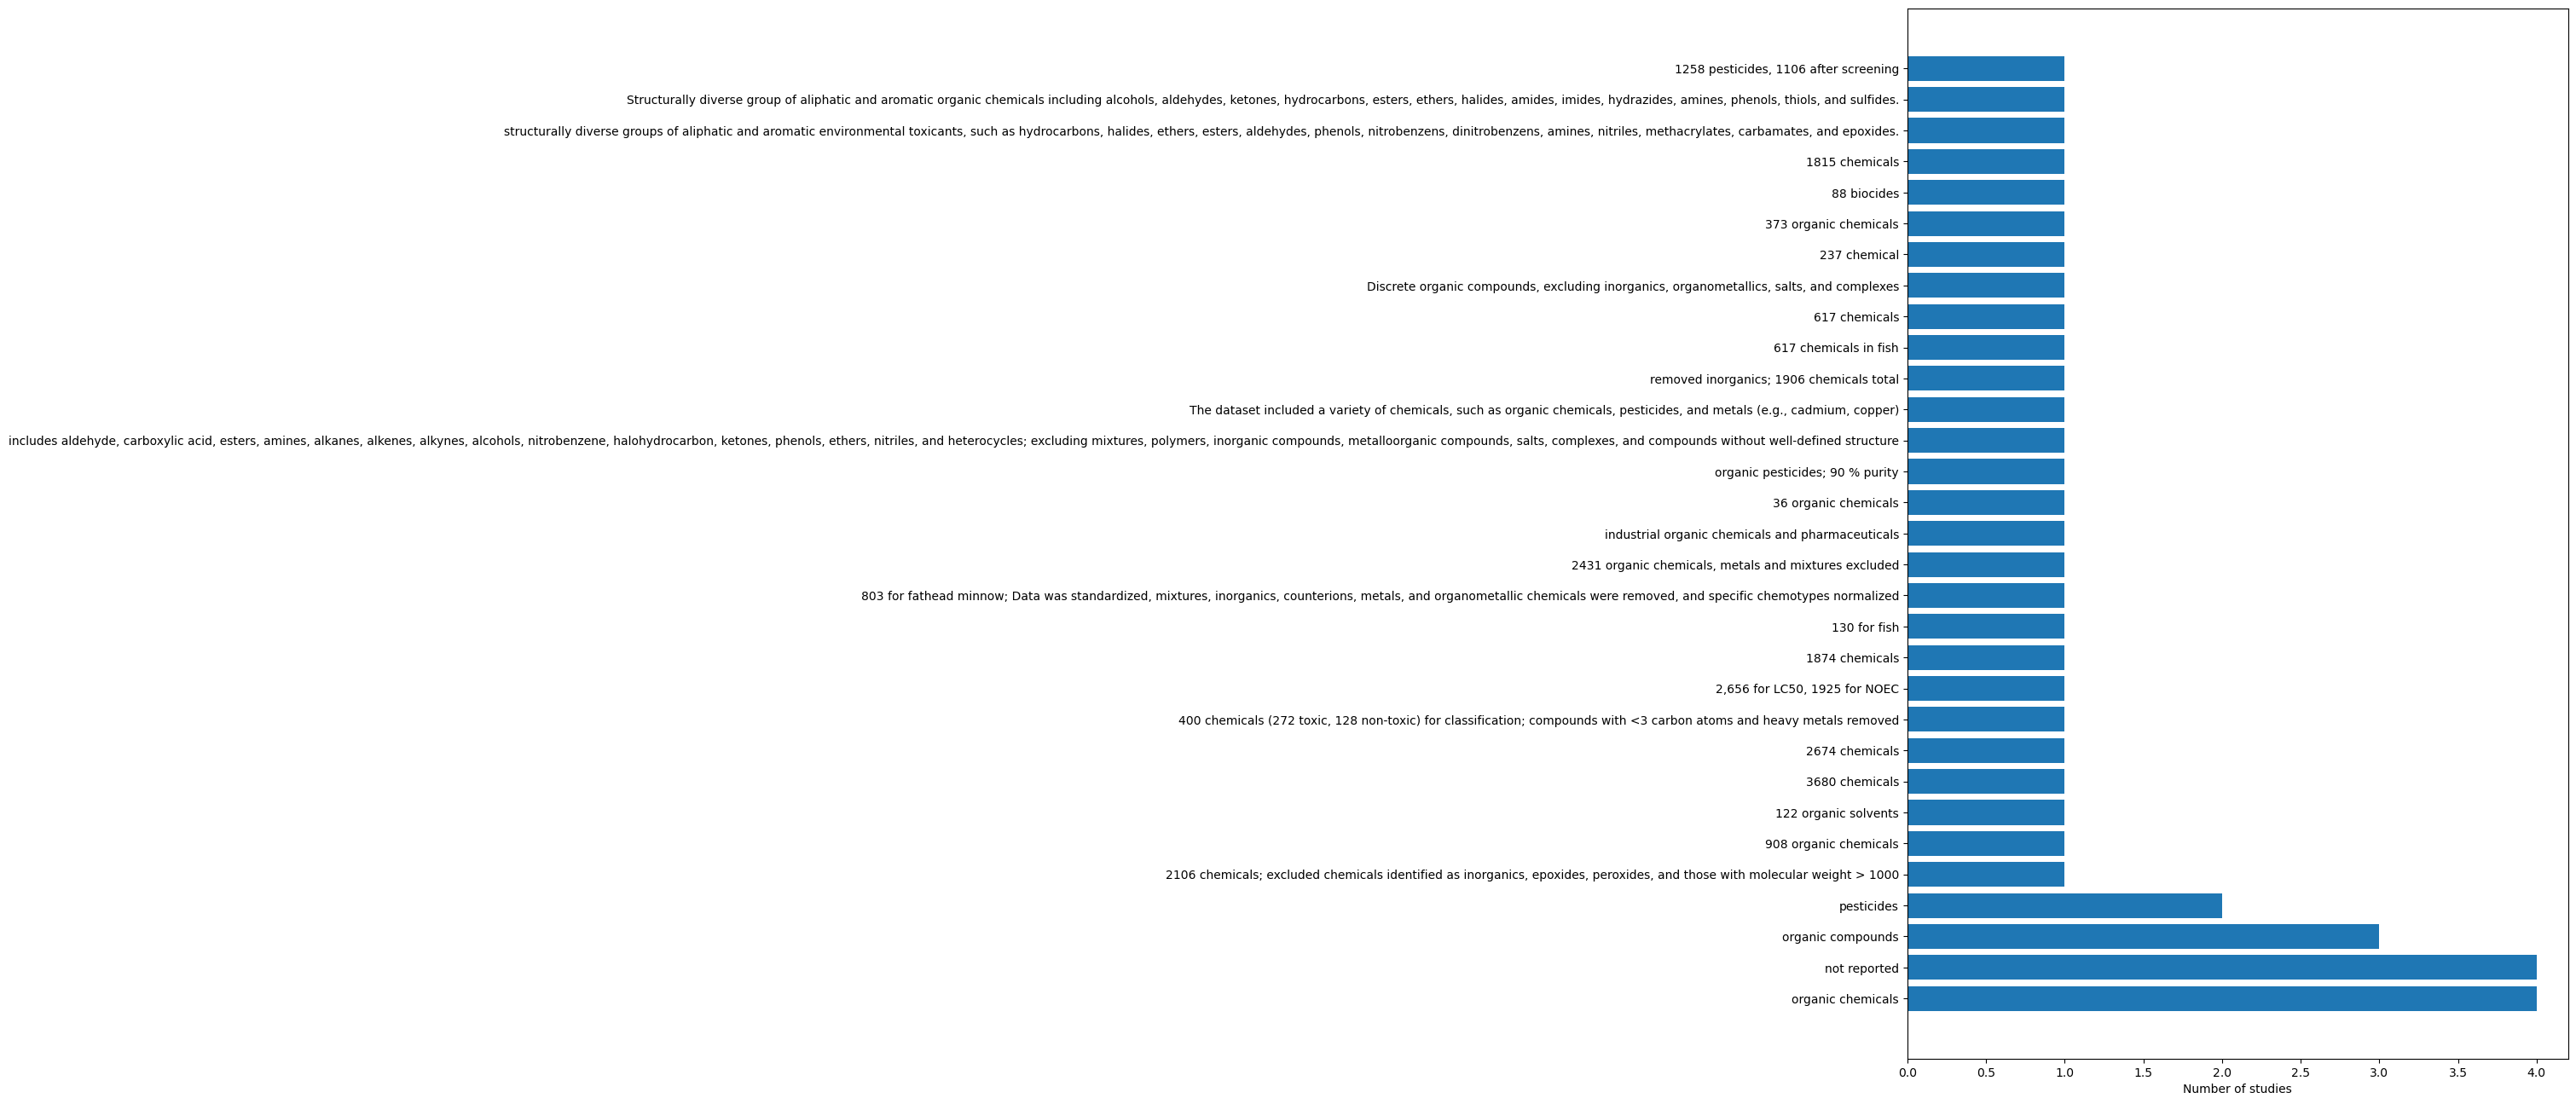

In [42]:
# Create histogram of the chemical spaces
   
fig, ax = plt.subplots(figsize=(10,16), nrows=1, ncols=1)

ax.barh(df['dataset_chemical_space'].value_counts().index,df['dataset_chemical_space'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()




### Plot taxonomic space

This data needs to be coarsened into categories

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


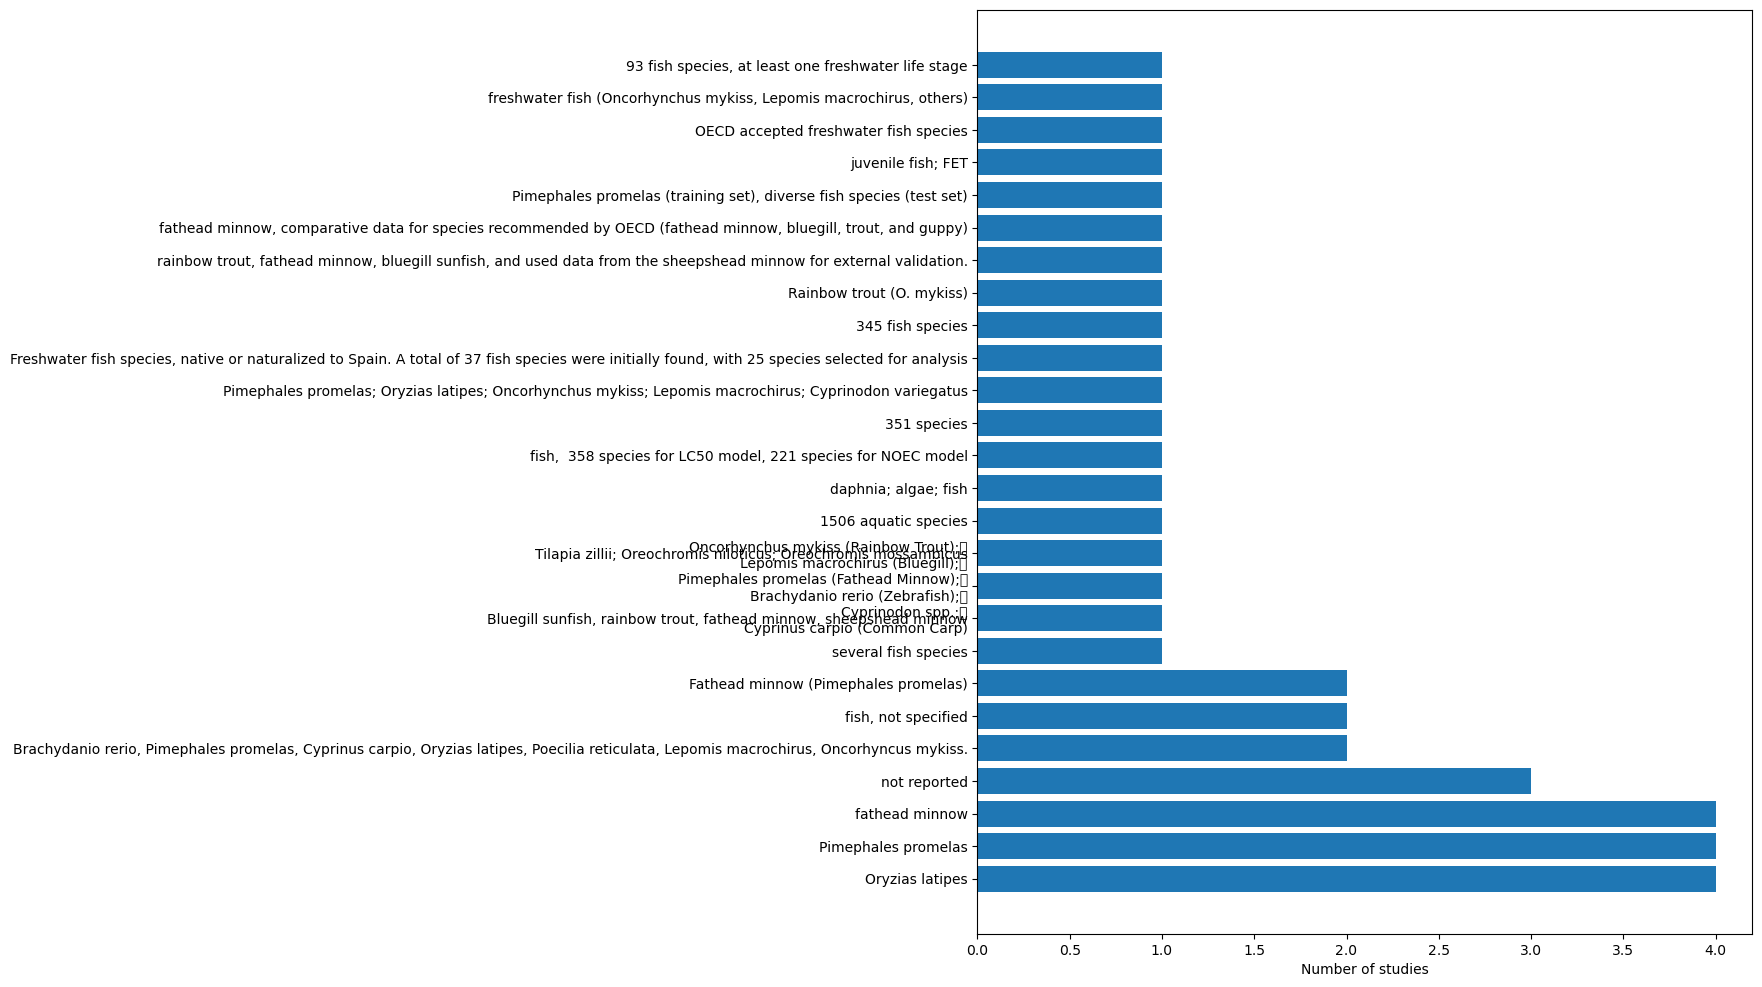

In [49]:
# Create histogram of the taxonomic spaces
   
fig, ax = plt.subplots(figsize=(10,12), nrows=1, ncols=1)
ax.barh(df[     'dataset_tax_space'].value_counts().index,      df['dataset_tax_space'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()



### Plot experiment space

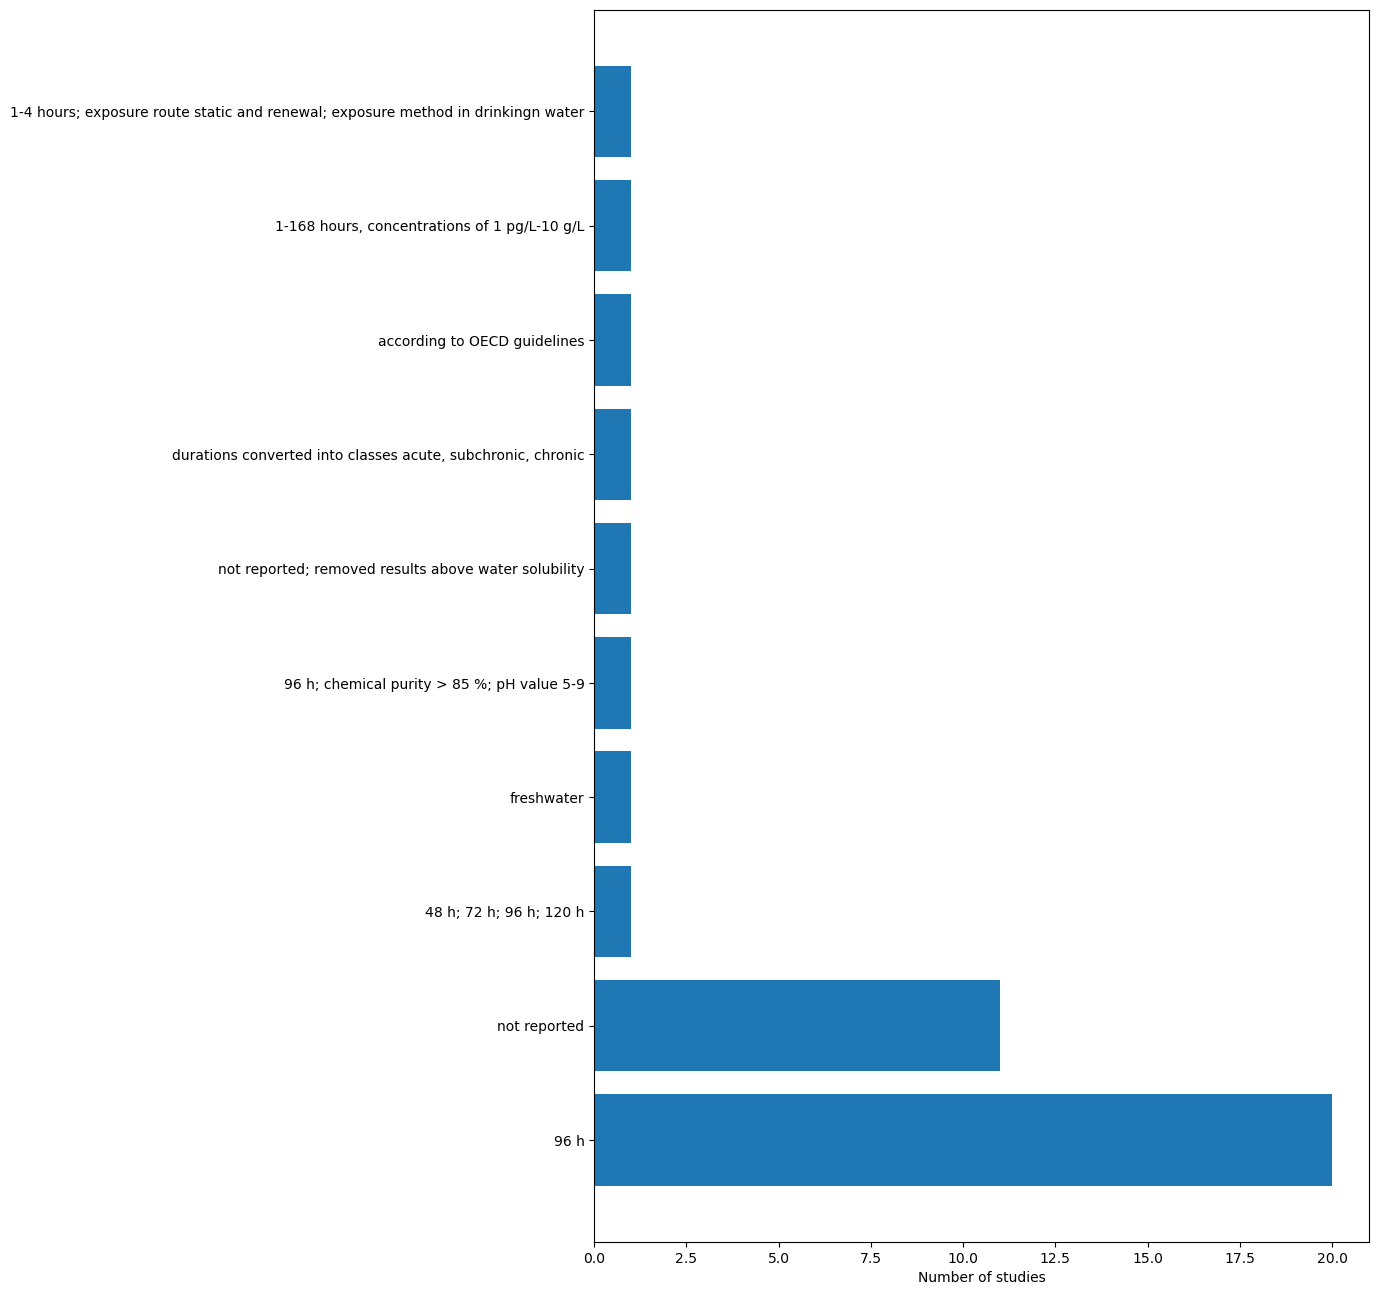

In [50]:
# Create histogram of the taxonomic spaces
   
fig, ax = plt.subplots(figsize=(10,16), nrows=1, ncols=1)

ax.barh(df['dataset_expspace'].value_counts().index, df['dataset_expspace'].value_counts().to_numpy())
plt.xlabel('Number of studies')

plt.show()

## Task


In [ ]:
task_cols = ['modeling_task', 'effect_type', 'effect_endpoint']

### Modeling task

In [ ]:
# translate entries separated by semicolons, into lists
for i in range(len(df)):
    if isinstance(df.modeling_task[i], str):    
        raw_entry = [df.modeling_task[i]]
        new_entry = re.split('; |, |;', raw_entry[0])
        df.at[i, 'modeling_task'] = new_entry.copy()


In [ ]:
sum(df.modeling_task.values,[])
flattened_tasks = sum(df.modeling_task.values,[])
unique_tasks = np.unique(flattened_tasks)


# Create histogram of the datasets
histo_tasks = np.ndarray(len(unique_tasks))

for ids,ds in enumerate(unique_tasks):
    histo_tasks[ids]=flattened_tasks.count(ds)


fig, ax = plt.subplots(figsize=(4,2), nrows=1, ncols=1)

ax.barh(unique_tasks, histo_tasks)
plt.xlabel('Number of studies')
plt.title('Modeling task')

plt.show()


### Effect and endpoint

In [ ]:
print('The dataset selects only effect=mortality and endpoint=LC50')
print('Effect:')
print(df['effect_type'].value_counts())
print('\nEndpoint:')
print(df['effect_endpoint'].value_counts())



## Cleaning

Needs to be coarsened in values

### Aggregation

In [ ]:
cleaning_cols = ['aggregation', 'missing_values', 'missing_values_desc',
       'standardization', 'standardization_desc', 'outliers_removed',
       'outliers_desc']


In [ ]:
for i,ds in enumerate(df.aggregation):
    temp=ds.replace('Averages taken for duplicates if ratio of highest to lowest values < 3:1; otherwise, record excluded.','arithmetic mean')        
    temp=temp.replace('not reported','unclear')
    temp=temp.replace('selected lowest value of multiples','minimum')
    temp=temp.replace('median of multiple values','median')
    temp=temp.replace('Calculation of median, arithmetic, and geometric means for multiple values; geometric mean chosen for normalization','geometric mean')
    temp=temp.replace('removed duplicates, removed conflicting records (same compound, different toxicity classes)','unclear')        
    temp=temp.replace('The toxicity values were divided into four categories via k-means clustering based on the toxicity levels. It involved categorization rather than the calculation of mean or medians but did classify values into distinct groups.','unclear')
    temp=temp.replace('geometric mean for chemical, species, test duration','geometric mean')
    temp=temp.replace('lowest value','minimum')
    temp=temp.replace('removal of duplicates with different biological activity','unclear')
    temp=temp.replace('averaging multiple entries for species-chemical combinations','arithmetic mean')
    temp=temp.replace('mean for multiple QSAR values','arithmetic mean')
    temp=temp.replace('where multiple values apply per chemical the most toxic data is selected','minimum') # most toxic is minimum LC50
    ds=deepcopy(temp)
    df.at[i,'aggregation']=temp

In [ ]:

fig, ax = plt.subplots(figsize=(5,3), nrows=1, ncols=1)

ax.barh(df['aggregation'].value_counts().index, df['aggregation'].value_counts().to_numpy())
plt.xlabel('Number of studies')
plt.xticks([0,5,10,15,20])

plt.show()

### Missing values

In [ ]:
plt.figure(figsize=(3,2))
df.missing_values.hist()
plt.ylabel('number of studies')
plt.show()


In [ ]:
print('Missing values description')
df.missing_values_desc.head(10)

### Standardization

In [ ]:
plt.figure(figsize=(3,2))
df.standardization.hist()
plt.ylabel('number of studies')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.standardization_desc.head(10)

### Outliers removed

In [ ]:
plt.figure(figsize=(3,2))
df.outliers_removed.hist()
plt.ylabel('number of studies')
plt.xticks(rotation=80)
plt.show()


In [ ]:
df.outliers_desc.head(10)

## Splitting

In [ ]:
splitting_cols=['splitting', 'splitting_desc', 'splitting_exact', 'splitting_ratio']


In [ ]:
df.splitting

## Metrics

In [ ]:
metrics_cols=['code_reported', 'metrics_clear', 'performance_metrics','dataset_availability']
df[metrics_cols]
df.iloc[4]

# Dataset comparable?

Take the ECOTOX, Japanese Ministry of the Environment, ECHA and the Kahn 2019 datasets only. How many of those have the same chemical and taxonomic spaces?

In [ ]:
df.dataset.duplicated()